# Problem Definition

### Which features influences it the most ?


### How to predict the car’s selling price ?

### How does MMR compare to the prediction price?

# Import Data and data cleaning

In [1]:
import pandas as pd
df=pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)

df=df.dropna() # i checked the na values, most of them are not important so I simply dropped them

# compute the age of the car when it is sold. makes more sense to me compared to the 'year' attribute
df['sale_date'] = pd.to_datetime(df['saledate'],utc=True)
df['sale_year']=df['sale_date'].dt.year
df['age']=df['sale_year']-df['year']

df['make']=df['make'].map(lambda x:str(x).lower()) # all characters would be lower-case so that there's less 'nuinque'
df['model']=df['model'].map(lambda x:str(x).lower())
df['trim']=df['trim'].map(lambda x:str(x).lower())
df['body']=df['body'].map(lambda x:str(x).lower())

df.head()

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_date,sale_year,age
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 04:30:00+00:00,2014,-1
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 04:30:00+00:00,2014,-1
2,2014,bmw,3 series,328i sulev,sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015-01-14 20:30:00+00:00,2015,1
3,2015,volvo,s60,t5,sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015-01-28 20:30:00+00:00,2015,0
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014-12-18 04:30:00+00:00,2014,0


### First, we dropped all the rows with 'NA' values. Then, we extracted a new variable from Sale Date and Year. This is because having an "Age" attribute may prove to be more important for the predictions than having a "Year" attribute. For uniformity, we changed all characters in the dataset to lowercase.

#### The dataset includes the following variables:
1. Year (Model year)
2. Make (Car brand)
3. Model (Car edition)
4. Trim (Car trim level; the model version)
5. Body (Car shape/body type)
6. Transmission (Power mechanism in the car)
7. VIN (Vehicle Identification Number)
8. State (The state where the car is being auctioned)
9. Condition (Car condition at time of auction)
10. Odometer (Car mileage)
11. Color (Exterior colour)
12. Interior (Interior colour)
13. Seller (Car seller)
14. MMR (Manheim Market Report)
15. Selling price (The price at which the car was sold at the auction)
16. Sale Date (The date the price was auctioned)
17. Sale Year (The year the car was auctioned; extracted from the Sale Date variable)
18. Age (The age of the car at time of auction; extracted by subtracting the Year from the Sale Year)



In [2]:
# 'vin' is the ID of the car, 'mmr' stands for 'manheim market report', which is a predicted price of the car
df1=df.drop(columns=['vin','seller','mmr','sale_date','sale_year','saledate','year'])

# some of 'age' are -1 for reasons i dont know, but not a big number, so i just dropped them
df1=df1.loc[df['age']>=0,:]

df1.head()

,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice,age
2,bmw,3 series,328i sulev,sedan,automatic,ca,4.5,1331.0,gray,black,30000,1
3,volvo,s60,t5,sedan,automatic,ca,4.1,14282.0,white,black,27750,0
4,bmw,6 series gran coupe,650i,sedan,automatic,ca,4.3,2641.0,gray,black,67000,0
6,bmw,m5,base,sedan,automatic,ca,3.4,14943.0,black,black,65000,0
7,chevrolet,cruze,1lt,sedan,automatic,ca,2.0,28617.0,black,black,9800,0


### VIN and Seller were deleted because their values hold no relevance for the dataset. Sale Date, Sale Year, and Year were deleted because the new "Age" variable tells a more concise story. MMR was also deleted, as it's not needed in the preliminary analysis.

### Some of the car ages were negative numbers, so they were deleted as well.

# Data Exploration

In [ ]:
df1.describe()

<AxesSubplot:>

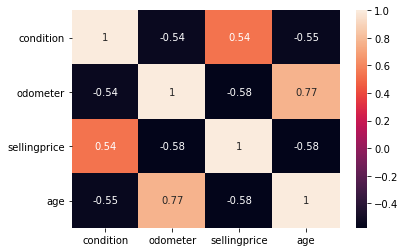

In [3]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True)

### Based on the heatmap;
- As Condition increases, so does Selling Price (and vice versa). Similarly, as Age increases, so does Odometer. 
- On the other hand, as Age increases, Condition decreases. The same negative relationship applies to Odometer and Condition, Selling Price and Condition, Age and Selling Price, as well as Odometer and Selling Price.

#### Though these relationships seem intuitive, they do not indicate causation between the variables.

array([[<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'odometer'}>],
       [<AxesSubplot:title={'center':'sellingprice'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

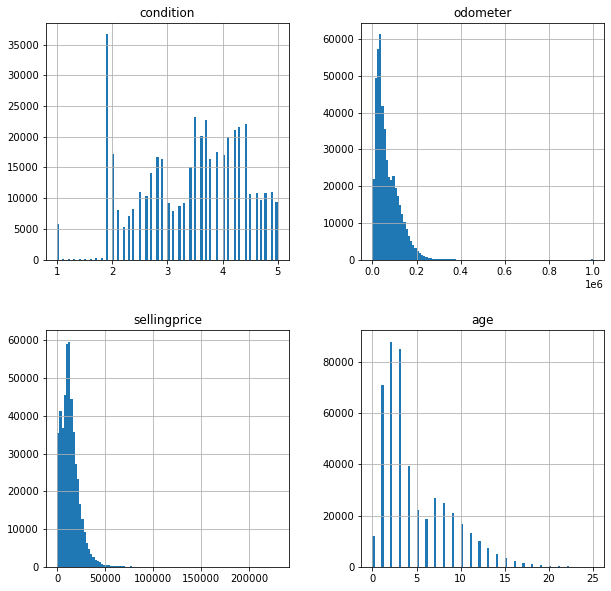

In [4]:
import matplotlib.pyplot as plt
df1.hist(bins=100,figsize=(10,10))

### Based on the histograms;
- The Condition values are spread from about 1.9 to 5, with most cars being rated 1.9.
- The Age values are skewed right.

# Data pre-processing

In [5]:
# in case that we ruin the originial dataframe
df2=df1.copy()

In [6]:
import numpy as np
# reindex the order of the columns to make it more convinient later
column_titles=['make', 'model', 'trim', 'body', 'transmission', 'state','color', 'interior',  'age','condition','odometer','sellingprice']
df2 = df2.reindex(columns=column_titles)

# prepare for shuffling
df2['age_cat'] = np.ceil(df2['age'] / 1.5)
df2['age_cat'].where(df2['age_cat'] < 10, 10.0, inplace=True)
df2['condition_cat']=round(df2['condition'],0)
df2['odometer_cat']=np.ceil(df2['odometer']/100000)
df2['odometer_cat'].where(df2['odometer_cat'] < 2, 2.0, inplace=True)

df2.head()

,make,model,trim,body,transmission,state,color,interior,age,condition,odometer,sellingprice,age_cat,condition_cat,odometer_cat
2,bmw,3 series,328i sulev,sedan,automatic,ca,gray,black,1,4.5,1331.0,30000,1.0,4.0,1.0
3,volvo,s60,t5,sedan,automatic,ca,white,black,0,4.1,14282.0,27750,0.0,4.0,1.0
4,bmw,6 series gran coupe,650i,sedan,automatic,ca,gray,black,0,4.3,2641.0,67000,0.0,4.0,1.0
6,bmw,m5,base,sedan,automatic,ca,black,black,0,3.4,14943.0,65000,0.0,3.0,1.0
7,chevrolet,cruze,1lt,sedan,automatic,ca,black,black,0,2.0,28617.0,9800,0.0,2.0,1.0


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False),['make', 'model', 'body', 'trim','transmission', 'state','color', 'interior'])], remainder='passthrough')
nparray=ct.fit_transform(df2)

# i transformed the result to dataframe cuz i don't know if numpy array could be directly shuffled.
df3=pd.DataFrame(nparray)


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df3, df3.iloc[:,-3:]):
    strat_train_set = df3.iloc[train_index]
    strat_test_set = df3.iloc[test_index]

#### We split the data to create a train set and a test set. 

In [9]:
strat_test_set.head()

,0,1,2,3,4,5,6,7,8,9,...,2420,2421,2422,2423,2424,2425,2426,2427,2428,2429
158676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,2.4,104340.0,5600.0,7.0,2.0,2.0
298720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,3.7,38425.0,13000.0,2.0,4.0,1.0
38427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.8,36746.0,10800.0,2.0,4.0,1.0
441549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,4.0,45468.0,25100.0,2.0,4.0,1.0
166136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,2.6,135109.0,2900.0,6.0,3.0,2.0


In [10]:
# drop the 'cat' columns we used for shuffling
strat_train_set=strat_train_set.drop(columns=[2427,2428,2429])
strat_test_set=strat_test_set.drop(columns=[2427, 2428, 2429])

In [11]:
X_train,y_train=strat_train_set.iloc[:,:-1].values,strat_train_set.iloc[:,-1].values
X_test,y_test=strat_test_set.iloc[:,:-1].values,strat_test_set.iloc[:,-1].values

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
scaler=StandardScaler()
num_attribs=[2423,2424,2425]
ct=ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
    ],remainder='passthrough')
X_train=ct.fit_transform(X_train)
X_train

array([[-0.18657857,  1.13803122, -0.23413206, ...,  0.        ,
         0.        ,  0.        ],
       [-0.71023956, -0.76991049, -0.74483815, ...,  0.        ,
         0.        ,  0.        ],
       [-0.71023956, -0.23992668, -0.18147222, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.23390056,  0.71404418, -0.69021584, ...,  0.        ,
         0.        ,  0.        ],
       [-0.71023956, -1.61788458,  0.06481879, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33708243,  1.24402798, -0.45714269, ...,  0.        ,
         0.        ,  0.        ]])

In [13]:
X_test=ct.transform(X_test)

# Modeling

## Decision Tree

In [14]:
%%time
from sklearn.tree import DecisionTreeRegressor
decisiontree = DecisionTreeRegressor()
decisiontree.fit(X_train,y_train)

Wall time: 1min 6s


DecisionTreeRegressor()

In [15]:
decisiontree.score(X_train,y_train)

0.9999999339958096

In [16]:
decisiontree.score(X_test,y_test)

0.9176776720082247

### Decision tree works extremely well on the traing set, but its r-score decreased on the test set. There's a great chance of overfitting so we moved forward to random forest.

## Random Forest

In [17]:
%%time
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_jobs=5)
forest.fit(X_train,y_train)

Wall time: 18min 48s


RandomForestRegressor(n_jobs=5)

In [18]:
forest.score(X_train,y_train)

0.99397908229943

In [19]:
forest.score(X_test,y_test)

0.9532187805510962

### Random forest works very well on our dataset, however, it is too slow (18min 48s). Considering the speed of grid search, we decided to discover more models. We learned from Google that 'XGBoost' could use GPU to accelerate the process of calculating. So we had a try on this new algorithm.

## XGBoost

In [4]:
%%time
#!pip install xgboost
import xgboost as xgb
bst=xgb.XGBRegressor(objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist')

CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 24.8 µs


In [23]:
bst.score(X_train,y_train)

0.9275683008284128

In [24]:
bst.score(X_test,y_test)

0.9190767500735787

### XGBoost gives a time-efficient model with good scores. So, we can move on to tune the hyperparameters using GridSearch.

# Grid  search 

### Tuning the n_estimators


In [26]:
%%time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [400,500,600,700,800,900,1000]},
  ]

bst1=xgb.XGBRegressor(objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist')

grid_search1 = GridSearchCV(bst1, param_grid, cv=3,
                           scoring='r2', return_train_score=True)
                           
grid_search1.fit(X_train, y_train)

Wall time: 25min 41s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [27]:
grid_search1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [28]:
grid_search1.score(X_train,y_train)

0.9746492158148162

In [29]:
grid_search1.score(X_test,y_test)

0.962125982482194

### Tuning the max_depth

In [30]:
%%time
param_grid = [
    {'max_depth': [5,6,7,8,9,10]},
  ]

bst2=xgb.XGBRegressor(objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist',n_estimators=1000)

grid_search2 = GridSearchCV(bst2, param_grid, cv=3,
                           scoring='r2', return_train_score=True)
                           
grid_search2.fit(X_train, y_train)

Wall time: 41min 17s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=1000, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
        

In [31]:
grid_search2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [32]:
grid_search2.score(X_train,y_train)

0.9809813885666147

In [33]:
grid_search2.score(X_test,y_test)

0.9630223836301666

### Tuning the learning rate

In [34]:
%%time
param_grid = [
    {'learning_rate': [0.01,0.03,0.05,0.1,0.2,0.3]},
  ]

bst3=xgb.XGBRegressor(objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist',n_estimators=1000,max_depth=8)

grid_search3 = GridSearchCV(bst3, param_grid, cv=3,
                           scoring='r2', return_train_score=True)
                           
grid_search3.fit(X_train, y_train)

Wall time: 45min 54s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=8, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=1000, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
           

In [35]:
grid_search3.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [36]:
grid_search3.score(X_train,y_train)

0.9809813885666147

In [37]:
grid_search3.score(X_test,y_test)

0.9630223836301666

based on grid search, 'grid_search3' gives the best result.

In [38]:
print(grid_search3.best_estimator_)
print(grid_search3.score(X_train,y_train))
print(grid_search3.score(X_test,y_test))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)
0.9809813885666147
0.9630223836301666


In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(grid_search3.predict(X_train),y_train,squared=False)

1326.3514838517399

In [40]:
mean_squared_error(grid_search3.predict(X_test),y_test,squared=False)

1840.4256469849538

### We can use grid search to tune the parameters to find the best estimators. However, it turned out to be so time-consuming that we had to resort to the next two ways to process the data even further.


## Further Data Processing

#### As we discovered above, 'one hot encoding' can produce a huge dimension if one column has high cardinality. To accelerate our model, we have to try to reduce the dimension while keep the accuracy of our model as high as possible.

### Modify lower frequency categories

In [41]:
df4=df2.copy()

In [42]:
df4['trim'].nunique()

1488

(0.0, 13000.0)

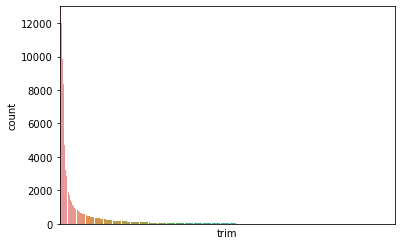

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(x='trim',data=df4,order=df4['trim'].value_counts().index)
ax.set_xticks([]) 
plt.ylim(0,13000)

#### Based on the graph above, we can see that most categories are concentrated at the top 10% of 'value_counts', which is around 400,000 rows. We decided to change the other categories that are around 10% lowest frequency into 'others' to reduce the dimension after 'one hot encoding'. 

In [44]:
trim_freq=df4['trim'].value_counts(normalize=True)
df4.loc[df4['trim'].isin(trim_freq[trim_freq<=trim_freq.quantile(q=0.9)].index),'trim']='others'

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False),['make', 'model', 'trim', 'body', 'transmission', 'state','color', 'interior'])], remainder='passthrough')
nparray=ct.fit_transform(df4)
df5=pd.DataFrame(nparray)

In [46]:
df5.head()

,0,1,2,3,4,5,6,7,8,9,...,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.5,1331.0,30000.0,1.0,4.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.1,14282.0,27750.0,0.0,4.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.3,2641.0,67000.0,0.0,4.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.4,14943.0,65000.0,0.0,3.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,28617.0,9800.0,0.0,2.0,1.0


In [47]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df5, df5.iloc[:,-3:]):
    strat_train_set2 = df5.iloc[train_index]
    strat_test_set2 = df5.iloc[test_index]

In [48]:
strat_train_set2=strat_train_set2.drop(columns=[1089,1090,1091])
strat_test_set2=strat_test_set2.drop(columns=[1089,1090,1091])

In [49]:
X_train_reduced,y_train_reduced=strat_train_set2.iloc[:,:-1].values,strat_train_set2.iloc[:,-1].values
X_test_reduced,y_test_reduced=strat_test_set2.iloc[:,:-1].values,strat_test_set2.iloc[:,-1].values

In [50]:
scaler2=StandardScaler()
num_attribs=[1085,1086,1087]
ct=ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
    ],remainder='passthrough')
X_train_reduced=ct.fit_transform(X_train_reduced)

In [51]:
X_test_reduced=ct.transform(X_test_reduced)

In [52]:
%%time
bst_reduced=xgb.XGBRegressor(objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist')
bst_reduced.fit(X_train_reduced,y_train_reduced)

Wall time: 9.57 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [53]:
bst_reduced.score(X_train_reduced,y_train_reduced)

0.9277945286126583

In [54]:
bst_reduced.score(X_test_reduced,y_test_reduced)

0.919907306658749

In [55]:
param_grid = {'n_estimators': [400,500,600,700,800,900,1000]}


bst_reduced1=xgb.XGBRegressor(objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist')

grid_search_reduced1 = GridSearchCV(bst_reduced1, param_grid, cv=3,
                           scoring='r2', return_train_score=True,n_jobs=5)
                           
grid_search_reduced1.fit(X_train_reduced, y_train_reduced)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [56]:
grid_search_reduced1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [57]:
grid_search_reduced1.score(X_train_reduced,y_train_reduced)

0.97261473283562

In [58]:
grid_search_reduced1.score(X_test_reduced,y_test_reduced)

0.9566506065053955

In [59]:
%%time
param_grid = {'max_depth': [4,5,6,7,8,9,10]}


bst_reduced2=xgb.XGBRegressor(objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist',n_estimators=1000)

grid_search_reduced2 = GridSearchCV(bst_reduced2, param_grid, cv=3,
                           scoring='r2', return_train_score=True,n_jobs=3)
                           
grid_search_reduced2.fit(X_train_reduced, y_train_reduced)

Wall time: 22min 18s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=1000, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
        

In [60]:
grid_search_reduced2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [61]:
grid_search_reduced2.score(X_train_reduced,y_train_reduced)

0.97261473283562

In [62]:
grid_search_reduced2.score(X_test_reduced,y_test_reduced)

0.9566506065053955

In [63]:
%%time
param_grid = {'learning_rate': [0.01,0.03,0.05,0.1,0.2,0.3]}


bst_reduced3=xgb.XGBRegressor(objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist',n_estimators=1000,max_depth=6)

grid_search_reduced3 = GridSearchCV(bst_reduced3, param_grid, cv=3,
                           scoring='r2', return_train_score=True,n_jobs=4)
                           
grid_search_reduced3.fit(X_train_reduced, y_train_reduced)

Wall time: 12min 24s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=6, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=1000, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
           

In [64]:
grid_search_reduced3.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [65]:
grid_search_reduced3.score(X_train_reduced,y_train_reduced)

0.97261473283562

In [66]:
grid_search_reduced3.score(X_test_reduced,y_test_reduced)

0.9566506065053955

### Based on the results above, 'grid_search_reduced3' performs the best: The score has dropped a little from the simply processed dataset, but it takes just about half the time of the first one.

In [67]:
print(grid_search_reduced3.best_estimator_)
print(grid_search_reduced3.score(X_train_reduced,y_train_reduced))
print(grid_search_reduced3.score(X_test_reduced,y_test_reduced))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)
0.97261473283562
0.9566506065053955


In [68]:
mean_squared_error(grid_search_reduced3.predict(X_train_reduced),y_train_reduced,squared=False)

1591.5772250824064

In [69]:
mean_squared_error(grid_search_reduced3.predict(X_test_reduced),y_test_reduced,squared=False)

1992.6927157169932

### PCA

### When it comes to dimension reduction, PCA comes to mind. Although we think that it makes more sense for continuous data, it is still worth a try considering that it could reduce the dimension even more and that could greatly improve the speed of our model.

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

In [74]:
pca.n_components_

247

In [71]:
X_test_pca=pca.transform(X_test)

In [72]:
%%time
import xgboost as xgb
bst_pca=xgb.XGBRegressor(objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist')
bst_pca.fit(X_train_pca,y_train)

Wall time: 6.31 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [75]:
bst_pca.score(X_train_pca,y_train)

0.9304281383756445

In [76]:
bst_pca.score(X_test_pca,y_test)

0.907120181646514

In [77]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [400,500,600,700,800,900,1000]},
  ]

bst_pca1=xgb.XGBRegressor(objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist')

grid_search_pca1 = GridSearchCV(bst_pca1, param_grid, cv=3,
                           scoring='r2', return_train_score=True,n_jobs=5)
                           
grid_search_pca1.fit(X_train_pca, y_train)

Wall time: 5min 51s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [78]:
grid_search_pca1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [79]:
grid_search_pca1.score(X_train_pca,y_train)

0.9805319436579198

In [80]:
grid_search_pca1.score(X_test_pca,y_test)

0.9311326312042236

In [81]:
%%time
param_grid = [
    {'max_depth': [4,5,6,7,8,9,10]},
  ]

bst_pca2=xgb.XGBRegressor(objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist',n_estimators=1000)

grid_search_pca2 = GridSearchCV(bst_pca2, param_grid, cv=3,
                           scoring='r2', return_train_score=True,n_jobs=4)
                           
grid_search_pca2.fit(X_train_pca, y_train)

Wall time: 20min 5s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=1000, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
        

In [86]:
grid_search_pca2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [87]:
grid_search_pca2.score(X_train_pca,y_train)

0.9691027384744718

In [88]:
grid_search_pca2.score(X_test_pca,y_test)

0.9312775227201152

In [89]:
%%time
param_grid = [
    {'learning_rate': [0.01,0.05,0.1,0.2,0.3]},
  ]

bst_pca3=xgb.XGBRegressor(objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist',n_estimators=1000,max_depth=5)

grid_search_pca3 = GridSearchCV(bst_pca3, param_grid, cv=3,
                           scoring='r2', return_train_score=True)
                           
grid_search_pca3.fit(X_train_pca, y_train)

Wall time: 4min 5s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=5, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=1000, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
           

In [90]:
grid_search_pca3.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [91]:
grid_search_pca3.score(X_train_pca,y_train)

0.9648621644314875

In [92]:
grid_search_pca3.score(X_test_pca,y_test)

0.9318974031407151

#### 'grid_search_pca3' gives the best results. PCA is faster than setting lower frequency categories as 'others', but it also loses some information and performs worse on test set.

In [94]:
print(grid_search_pca3.best_estimator_)
print(grid_search_pca3.score(X_train_pca,y_train))
print(grid_search_pca3.score(X_test_pca,y_test))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)
0.9648621644314875
0.9318974031407151


In [95]:
from sklearn.metrics import mean_squared_error
mean_squared_error(grid_search_pca3.predict(X_train_pca),y_train,squared=False)

1802.8381013711783

In [96]:
mean_squared_error(grid_search_pca3.predict(X_test_pca),y_test,squared=False)

2497.644690955017

## LGBMRegression

In [97]:
df6=df2.copy()

In [98]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df6, df6.iloc[:,-3:]):
    strat_train_set3 = df6.iloc[train_index]
    strat_test_set3 = df6.iloc[test_index]
strat_test_set3.head()

,make,model,trim,body,transmission,state,color,interior,age,condition,odometer,sellingprice,age_cat,condition_cat,odometer_cat
196011,nissan,pathfinder,se,suv,automatic,pa,gray,gray,10,2.4,104340.0,5600,7.0,2.0,2.0
355385,honda,civic,lx,sedan,automatic,tx,red,tan,2,3.7,38425.0,13000,2.0,4.0,1.0
56523,hyundai,sonata,gls,sedan,automatic,oh,black,gray,3,3.8,36746.0,10800,2.0,4.0,1.0
522254,ford,f-150,xlt,supercrew,automatic,ms,—,gray,3,4.0,45468.0,25100,2.0,4.0,1.0
204442,dodge,magnum,se,wagon,automatic,ca,gray,gray,9,2.6,135109.0,2900,6.0,3.0,2.0


In [99]:
strat_train_set3=strat_train_set3.drop(columns=['age_cat','condition_cat','odometer_cat'])
strat_test_set3=strat_test_set3.drop(columns=['age_cat','condition_cat','odometer_cat'])

In [203]:
X_train_lgb,y_train_lgb=strat_train_set3.iloc[:,:-1],strat_train_set3.iloc[:,-1]
X_test_lgb,y_test_lgb=strat_test_set3.iloc[:,:-1],strat_test_set3.iloc[:,-1]

In [204]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
scaler=StandardScaler()
num_attribs=['age','condition','odometer']
ct=ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
    ],remainder='passthrough')
nparray=ct.fit_transform(X_train_lgb)
X_train_lgb=pd.DataFrame(nparray)
X_train_lgb

,0,1,2,3,4,5,6,7,8,9,10
0,-0.186579,1.138031,-0.234132,cadillac,escalade,luxury,suv,automatic,mn,silver,black
1,-0.71024,-0.76991,-0.744838,lexus,rx 350,base,suv,automatic,wi,gray,black
2,-0.71024,-0.239927,-0.181472,chevrolet,impala,ls fleet,sedan,automatic,nv,silver,gray
3,-0.71024,0.502051,-0.448196,chrysler,town and country,touring,minivan,automatic,tx,blue,black
4,-0.97207,0.078064,-0.538509,kia,sorento,lx,suv,automatic,ga,silver,gray
...,...,...,...,...,...,...,...,...,...,...,...
377738,-0.97207,0.926038,-1.164231,toyota,corolla,s,sedan,automatic,tn,silver,black
377739,-0.71024,-0.875907,-0.890523,ford,fusion,titanium,sedan,automatic,ca,white,black
377740,-1.233901,0.714044,-0.690216,ford,focus,se,hatchback,automatic,ca,gray,black
377741,-0.71024,-1.617885,0.064819,ford,explorer,xlt,suv,automatic,wi,silver,black


In [103]:
nparray2=ct.fit_transform(X_test_lgb)
X_test_lgb=pd.DataFrame(nparray2)
X_test_lgb

,0,1,2,3,4,5,6,7,8,9,10
0,1.384769,-1.087295,0.727946,nissan,pathfinder,se,suv,automatic,pa,gray,gray
1,-0.711168,0.289993,-0.544801,honda,civic,lx,sedan,automatic,tx,red,tan
2,-0.449176,0.395938,-0.577221,hyundai,sonata,gls,sedan,automatic,oh,black,gray
3,-0.449176,0.607829,-0.408809,ford,f-150,xlt,supercrew,automatic,ms,—,gray
4,1.122777,-0.875404,1.322062,dodge,magnum,se,wagon,automatic,ca,gray,gray
...,...,...,...,...,...,...,...,...,...,...,...
94431,-1.235152,0.184048,-0.989602,ford,focus,se,sedan,automatic,pa,silver,beige
94432,-0.97316,1.137555,-0.992768,ford,f-150,xlt,supercab,automatic,mi,black,gray
94433,-0.187184,-2.570528,0.051786,chevrolet,hhr,lt,wagon,automatic,il,silver,black
94434,0.598793,-1.511076,-1.286728,saturn,vue,xe,suv,automatic,mn,blue,beige


In [104]:
X_train_lgb.columns=[ 'age', 'condition', 'odometer','make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior']
X_test_lgb.columns=[ 'age', 'condition', 'odometer','make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior']

In [105]:
X_train_lgb[['make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior']]=X_train_lgb[['make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior']].astype('category')
X_train_lgb[['age', 'condition', 'odometer']]=X_train_lgb[['age', 'condition', 'odometer']].astype(float)
X_test_lgb[['make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior']]=X_test_lgb[['make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior']].astype('category')
X_test_lgb[['age', 'condition', 'odometer']]=X_test_lgb[['age', 'condition', 'odometer']].astype(float)

In [106]:
X_train_lgb.dtypes

age              float64
condition        float64
odometer         float64
make            category
model           category
trim            category
body            category
transmission    category
state           category
color           category
interior        category
dtype: object

In [112]:
%%time
import lightgbm as lgb
bst_lgb=lgb.LGBMRegressor()
bst_lgb.fit(X_train_lgb,y_train_lgb,feature_name='auto',categorical_feature=['make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior'])

Wall time: 604 ms


LGBMRegressor()

In [113]:
bst_lgb.score(X_train_lgb,y_train_lgb)

0.9584041008041604

In [114]:
bst_lgb.score(X_test_lgb,y_test_lgb)

0.9537921451102358

### feature importance

In [115]:
importance=bst_lgb.feature_importances_
names=bst_lgb.feature_name_
dict(sorted(zip(importance,names),reverse=True))

{937: 'model',
 754: 'trim',
 362: 'odometer',
 314: 'age',
 231: 'make',
 149: 'body',
 122: 'condition',
 71: 'state',
 30: 'interior',
 24: 'color',
 6: 'transmission'}

In [116]:
bst_lgb.get_params(deep=True)

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [117]:
%%time
param_grid = [
    {'n_estimators': list(range(100,1100,100))},
  ]
bst_lgb1=lgb.LGBMRegressor(n_jobs=-1)
grid_search_lgb1 = GridSearchCV(bst_lgb1, param_grid, cv=3,
                           scoring='r2', return_train_score=True,n_jobs=5)
grid_search_lgb1.fit(X_train_lgb, y_train_lgb,feature_name='auto',categorical_feature=['make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior'])

C:\Users\13202\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Wall time: 1min 9s


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=5,
             param_grid=[{'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                           800, 900, 1000]}],
             return_train_score=True, scoring='r2')

In [118]:
grid_search_lgb1.best_estimator_

LGBMRegressor(n_estimators=1000)

In [125]:
grid_search_lgb1.score(X_train_lgb,y_train_lgb)

0.974343716848096

In [126]:
grid_search_lgb1.score(X_test_lgb,y_test_lgb)

0.9643355155601905

In [121]:
%%time
param_grid = [
    {'max_depth': list(range(4,10)),'num_leaves': list(range(30,80,10))},
  ]
bst_lgb2=lgb.LGBMRegressor(n_jobs=-1,n_estimators=1000)

grid_search_lgb2 = GridSearchCV(bst_lgb2, param_grid, cv=3,
                           scoring='r2', return_train_score=True,n_jobs=5)
                           
grid_search_lgb2.fit(X_train_lgb, y_train_lgb,feature_name='auto',categorical_feature=['make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior'])

C:\Users\13202\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Wall time: 7min 35s


GridSearchCV(cv=3, estimator=LGBMRegressor(n_estimators=1000), n_jobs=5,
             param_grid=[{'max_depth': [4, 5, 6, 7, 8, 9],
                          'num_leaves': [30, 40, 50, 60, 70]}],
             return_train_score=True, scoring='r2')

In [122]:
grid_search_lgb2.best_estimator_

LGBMRegressor(max_depth=8, n_estimators=1000, num_leaves=70)

In [127]:
grid_search_lgb2.score(X_train_lgb,y_train_lgb)

0.9778360584122503

In [128]:
grid_search_lgb2.score(X_test_lgb,y_test_lgb)

0.9651224328066688

In [129]:
%%time
param_grid = [
    {'num_leaves': list(range(70,260,30))},
  ]
bst_lgb3=lgb.LGBMRegressor(n_jobs=-1,n_estimators=1000,max_depth=8)

grid_search_lgb3 = GridSearchCV(bst_lgb3, param_grid, cv=3,
                           scoring='r2', return_train_score=True,n_jobs=5)
                           
grid_search_lgb3.fit(X_train_lgb, y_train_lgb,feature_name='auto',categorical_feature=['make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior'])

C:\Users\13202\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Wall time: 6min 18s


GridSearchCV(cv=3, estimator=LGBMRegressor(max_depth=8, n_estimators=1000),
             n_jobs=5,
             param_grid=[{'num_leaves': [70, 100, 130, 160, 190, 220, 250]}],
             return_train_score=True, scoring='r2')

In [130]:
grid_search_lgb3.best_estimator_

LGBMRegressor(max_depth=8, n_estimators=1000, num_leaves=190)

In [131]:
grid_search_lgb3.score(X_train_lgb,y_train_lgb)

0.9808205607109471

In [132]:
grid_search_lgb3.score(X_test_lgb,y_test_lgb)

0.9654080250221088

In [134]:
%%time
param_grid = [
    {'learning_rate': [0.01,0.03,0.05,0.1,0.2,0.3]},
  ]
bst_lgb4=lgb.LGBMRegressor(n_jobs=-1,n_estimators=1000,max_depth=8,num_leaves=190)

grid_search_lgb4 = GridSearchCV(bst_lgb4, param_grid, cv=3,
                           scoring='r2', return_train_score=True,n_jobs=5)
                           
grid_search_lgb4.fit(X_train_lgb, y_train_lgb,feature_name='auto',categorical_feature=['make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior'])

C:\Users\13202\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Wall time: 5min 47s


GridSearchCV(cv=3,
             estimator=LGBMRegressor(max_depth=8, n_estimators=1000,
                                     num_leaves=190),
             n_jobs=5,
             param_grid=[{'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2, 0.3]}],
             return_train_score=True, scoring='r2')

In [135]:
grid_search_lgb4.best_estimator_

LGBMRegressor(max_depth=8, n_estimators=1000, num_leaves=190)

In [137]:
grid_search_lgb4.score(X_train_lgb,y_train_lgb)

0.9808205607109471

In [138]:
grid_search_lgb4.score(X_test_lgb,y_test_lgb)

0.9654080250221088

'grid_search_lgb4' gives the best results and also fits the data fastest. Also, it gives us some information about the feature importance since it can deal with categorical data directly without the need of 'one hot encoder'. Therefore, we think that light gradient boost machine is the best for our dataset.

In [139]:
print(grid_search_lgb4.best_estimator_)
print(grid_search_lgb4.score(X_train_lgb,y_train_lgb))
print(grid_search_lgb4.score(X_test_lgb,y_test_lgb))

LGBMRegressor(max_depth=8, n_estimators=1000, num_leaves=190)
0.9808205607109471
0.9654080250221088


In [140]:
mean_squared_error(grid_search_lgb4.predict(X_train_lgb),y_train_lgb,squared=False)

1331.9477177821816

In [141]:
mean_squared_error(grid_search_lgb4.predict(X_test_lgb),y_test_lgb,squared=False)

1780.067616719293

## Predict the price

# Result Visualization

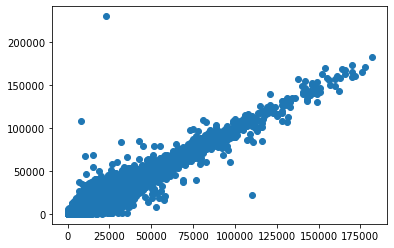

In [142]:
import matplotlib.pyplot as plt
plt.scatter(df['mmr'],df['sellingprice'])

In [143]:
mean_squared_error(df['mmr'],df['sellingprice'],squared=False)

1747.3856355457406

In [144]:
from sklearn.metrics import r2_score

In [145]:
r2_score(df['mmr'],df['sellingprice'])

0.9663954279614954

In [199]:
X_lgb=df6[['make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior', 'age', 'condition', 'odometer']]

In [205]:
nparray3=ct.transform(X_lgb)
X_lgb=pd.DataFrame(nparray3)

In [206]:
X_lgb.columns=[ 'age', 'condition', 'odometer','make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior']
X_lgb[['make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior']]=X_lgb[['make', 'model', 'trim', 'body', 'transmission', 'state', 'color','interior']].astype('category')
X_lgb[['age', 'condition', 'odometer']]=X_lgb[['age', 'condition', 'odometer']].astype(float)

In [207]:
X_lgb.dtypes

age              float64
condition        float64
odometer         float64
make            category
model           category
trim            category
body            category
transmission    category
state           category
color           category
interior        category
dtype: object

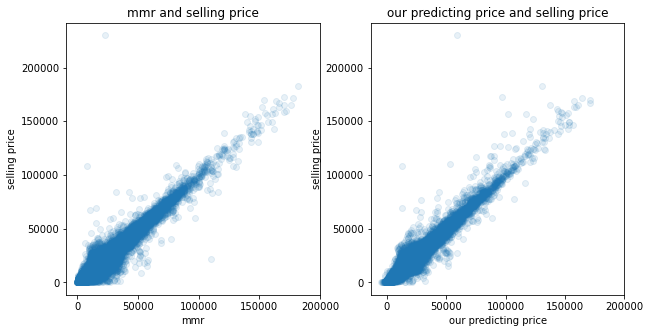

In [225]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(df['mmr'],df['sellingprice'],alpha=0.1)
ax[0].set_title('mmr and selling price')
ax[0].set_xlabel('mmr')
ax[0].set_ylabel('selling price')
ax[0].set_xticks([0,50000,100000,150000,200000])
ax[1].scatter(grid_search_lgb4.predict(X_lgb),df6['sellingprice'],alpha=0.1)
ax[1].set_title('our predicting price and selling price')
ax[1].set_xlabel('our predicting price')
ax[1].set_ylabel('selling price')
ax[1].set_xticks([0,50000,100000,150000,200000])
plt.show()

In [217]:
mean_squared_error(grid_search_lgb4.predict(X_lgb),df6['sellingprice'],squared=False)

1432.655154540607

In [226]:
r2_score(grid_search_lgb4.predict(X_lgb),df6['sellingprice'])

0.9770882651882185

# Result Interpretation